# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [7]:
dataset_train = pd.read_csv('AirPassengers.csv')
training_set = dataset_train.iloc[:,1:2].values

### Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [12]:
X_train = []
y_train = []
for i in range(60, 144):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)   

### Reshaping

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
X_train.shape

(84, 60, 1)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [10]:
rnn = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [11]:
rnn.add(LSTM(units = 50 , return_sequences = True, input_shape = (X_train.shape[1], 1) ))
rnn.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [12]:
rnn.add(LSTM(units = 50 , return_sequences = True ))
rnn.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [13]:
rnn.add(LSTM(units = 50 , return_sequences = True ))
rnn.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [14]:
rnn.add(LSTM(units = 50 ))
rnn.add(Dropout(0.2))

### Adding the output layer

In [15]:
rnn.add(Dense(units=1))

### Compiling the RNN

In [16]:
rnn.compile(optimizer = 'adam', loss= 'mean_squared_error')

### Fitting the RNN to the Training set

In [17]:
rnn.fit(X_train, y_train, epochs= 100 , batch_size = 32)

Epoch 1/100
146/146 [==============================] - 36s 178ms/step - loss: 0.0059
Epoch 2/100
146/146 [==============================] - 26s 176ms/step - loss: 0.0016
Epoch 3/100
146/146 [==============================] - 26s 176ms/step - loss: 0.0014
Epoch 4/100
146/146 [==============================] - 25s 174ms/step - loss: 0.0013
Epoch 5/100
146/146 [==============================] - 25s 172ms/step - loss: 0.0013
Epoch 6/100
146/146 [==============================] - 25s 174ms/step - loss: 0.0013
Epoch 7/100
146/146 [==============================] - 25s 172ms/step - loss: 0.0012
Epoch 8/100
146/146 [==============================] - 25s 172ms/step - loss: 0.0010
Epoch 9/100
146/146 [==============================] - 25s 172ms/step - loss: 9.8556e-04
Epoch 10/100
146/146 [==============================] - 25s 173ms/step - loss: 9.0808e-04
Epoch 11/100
146/146 [==============================] - 25s 173ms/step - loss: 9.2661e-04
Epoch 12/100
146/146 [=============================

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv('TCS_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 277):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = rnn.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)                                              

### Visualising the results

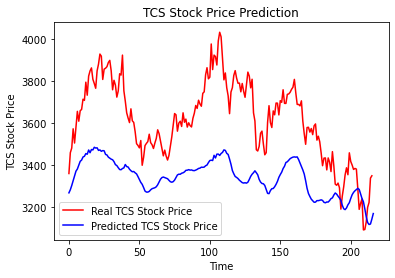

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real TCS Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()

In [24]:
# import math
# from sklearn.metrics import mean_squared_error
# rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
# print(rmse)

## Evaluating the RNN
Hi guys,

as seen in the practical lectures, the RNN we built was a regressor. Indeed, we were dealing with Regression because we were trying to predict a continuous outcome (the Google Stock Price). For Regression, the way to evaluate the model performance is with a metric called RMSE (Root Mean Squared Error). It is calculated as the root of the mean of the squared differences between the predictions and the real values.

However for our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite direction from the real stock price.

Nevertheless if you are interested in the code that computes the RMSE for our Stock Price Prediction problem, please find it just below:

#import math                                                                                                                
#from sklearn.metrics import mean_squared_error                                                                              
#rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price)) 

Then consider dividing this RMSE by the range of the Google Stock Price values of January 2017 (that is around 800) to get a relative error, as opposed to an absolute error. It is more relevant since for example if you get an RMSE of 50, then this error would be very big if the stock price values ranged around 100, but it would be very small if the stock price values ranged around 10000.

Enjoy Deep Learning!

## Improving the RNN
Hi guys,

here are different ways to improve the RNN model:

1. Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.

2. Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).

3. Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.

4. Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.

5. Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.

Enjoy Deep Learning!